# COSC 3337: Data Science I
# Homework 1 (Regression)

# Dr. Rizk

### [100 points]


_About The Data_

The data we'll be using comes from kaggle, and contains the following car attributes:

    car_ID
    symboling
    CarName
    fueltype
    aspiration
    doornumber
    carbody
    drivewheel
    enginelocation
    wheelbase
    carlength
    carwidth
    carheight
    curbweight
    enginetype
    cylindernumber
    enginesize
    fuelsystem
    boreratio
    stroke
    compressionratio
    horsepower
    peakrpm
    citympg
    highwaympg
    price

## Problem Statement

You are required to model the price of cars with the available independent variables. It will be used by your management team to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In general, your company would like for you to answer the following:

    Which variables are significant in predicting the price of a car
    How well those variables describe the price of a car



## Part 1: Reading and Understanding the Data

### [8 points]

Begin by importing some necessary libraries that you'll be using to explore the data.

In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [286]:
rcParams['figure.figsize'] = 8, 5
sns.set_style('darkgrid')

1.1 Import the data using pandas and save into a variable named cars_df. Then display the first 5 rows.

[3 Points]

In [287]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
cars_df = pd.read_csv('car_data.csv')
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


1.2 Print some basic statistics of your data.

[3 Points]

In [288]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
cars_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


1.3 Print some general information about your data using pandas.

[2 Points]

In [289]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
cars_df['car_company'] = cars_df['CarName']

cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

By looking at our previous output, are there any missing values in this dataset? How do we know?

### TYPE YOUR ANSWER HERE

No, there aren't any missing values as all variables are non-null.

## Part 2: Data Cleaning and Preparation

### [7 Points]

2.1 Instead of using car names, let's extract company names to see how the companies are distributed. Use the CarName column to create a new column in cars_df called 'car_company' that tells us which company the car belongs to. Once you've accomplished this, display all of the unique company names in our dataset.

Hint: Every carName value has the car company name placed in front of it, so you can parse it out. Also lowercase every company name to ensure that we don't double count something like bmw with BMW.

[3 Points]

In [290]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
print("The unique companies in our dataset are: \n", cars_df['CarName'].str.split().str[0].str.lower().unique())

The unique companies in our dataset are: 
 ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


2.2 Notice how there are some typos in the data. 'toyouta' should be 'toyota', 'porcshce' should be 'porsche', 'maxda' should be 'mazda', 'vokswagen' should be 'volkswagen', and 'vw' should be 'volkswagen'. Use Pandas to make these name corrections and display the unique company names again.

[4 Points]

In [291]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
name_corrections = {'toyouta': 'toyota','porcshce': 'porsche','maxda': 'mazda','vokswagen': 'volkswagen','vw': 'volkswagen'}
cars_df['CarName'] = cars_df['CarName'].str.split().str[0].str.lower().replace(name_corrections)
print("The unique companies in our dataset are: \n", cars_df['CarName'].unique())

The unique companies in our dataset are: 
 ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


## Part 3: Visualising Categorical Data

### [50 points]


    CompanyName
    Symboling
    fueltype
    enginetype
    carbody
    doornumber
    enginelocation
    fuelsystem
    cylindernumber
    aspiration
    drivewheel

3.1 Create the following plots

    1. A plot of the unique company names on the x-axis, and the value counts on the y-axis.
    2. A plot of the unique car bodys on the x-axis and value counts on the y-axis.

[4 Points]

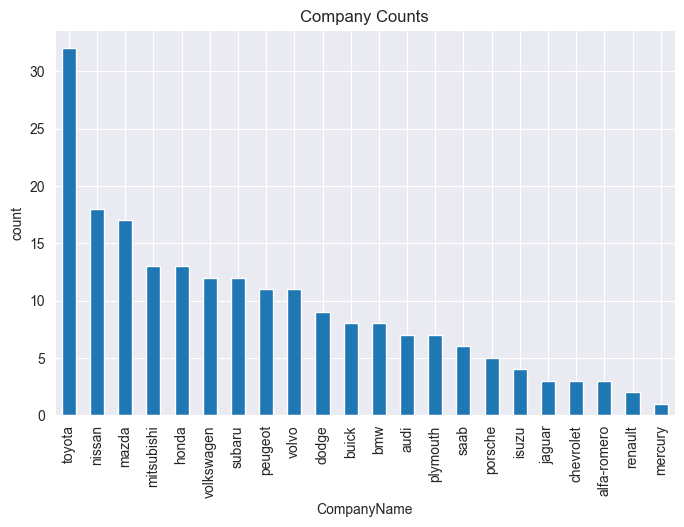

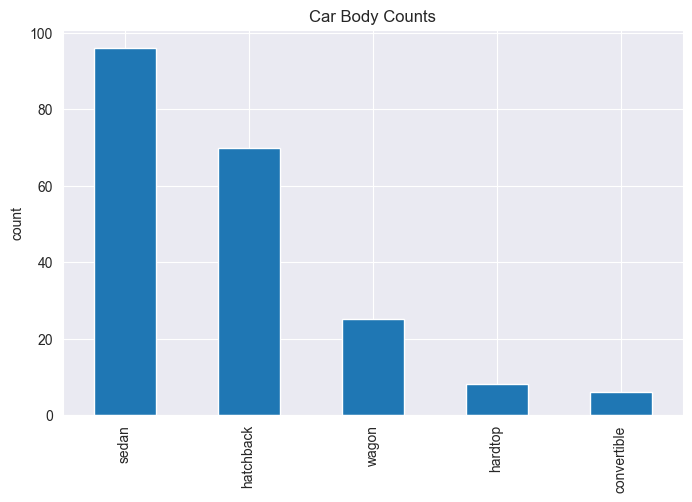

In [292]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
cars_df['CarName'].value_counts().plot(kind = 'bar', title = 'Company Counts', xlabel = 'CompanyName', ylabel = 'count')
plt.show()

cars_df['carbody'].value_counts().plot(kind = 'bar', title = 'Car Body Counts', xlabel = '', ylabel = 'count')
plt.show()

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

From creating these 2 plots, we can conclude that most body type available is sedan, then hatchback, wagon, hardtop, convertible. Of all these types, majority of the cars are Japanese brand like Toyota, Nissan, Mazda.

3.2 Create the following plots

    1. A plot of the unique company names on the x-axis, and that companies average price on the y-axis.
    2. A plot of the unique car bodys on the x-axis and that car body's average price on the y-axis.

[4 Points]

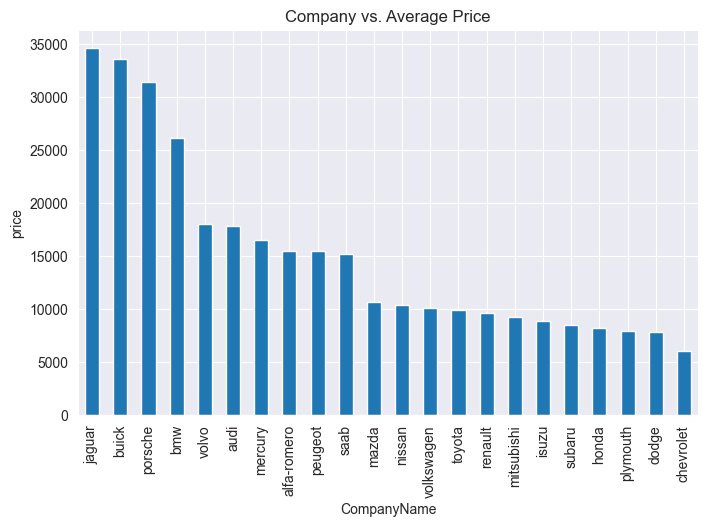

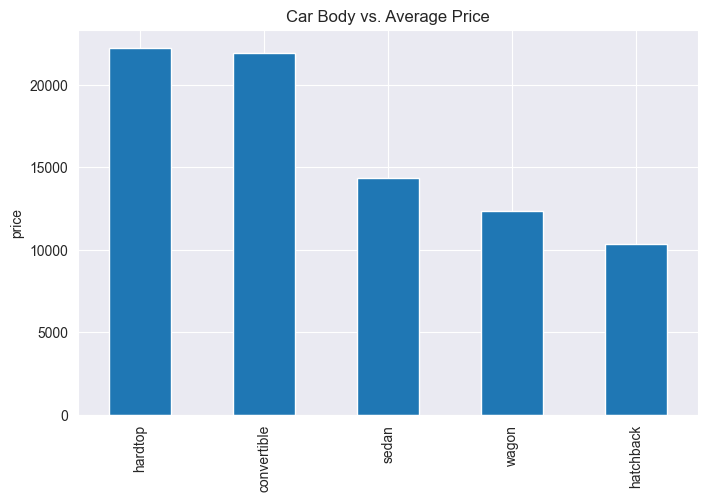

In [293]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
cars_df.groupby(by='CarName')['price'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Company vs. Average Price', xlabel = 'CompanyName', ylabel = 'price')
plt.show()

cars_df.groupby(by='carbody')['price'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Car Body vs. Average Price', xlabel = '', ylabel = 'price')
plt.show()

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

After creating these 2 plots, we can conclude that the most expensive body type is hardtop, then the second most expensive is convertible, then third most is sedan, then fourth most is sedan, and lastly the cheapest one is an hatchback. Of all these body types, regardless of what the body type really is its said to be true that Jaguar is the most expensive brand out of all the other brands while Chevrolet is the cheapest brand. Every other brand falls in between in terms of the brand name and price. Its also seen in the car brand and price relationship that many brands are close to one another in pricing despite being a little cheaper or expensive; however, its easy to notice how there's a big price jump between BMW and Volvo as BMW is approximately $8000-9000 more expensive than a Volvo.

3.3 Create the following plots

    1. A plot of the unique symboling values on the x-axis, and the value counts on the y-axis.
    2. A box plot of the unique symboling values on the x-axis and price on the y-axis.

[4 Points]

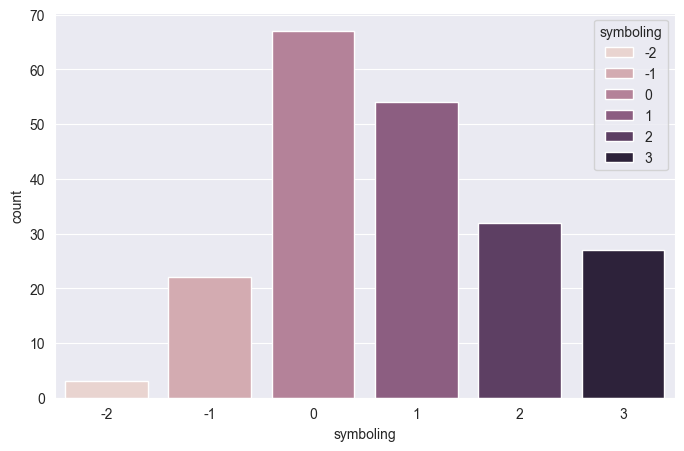

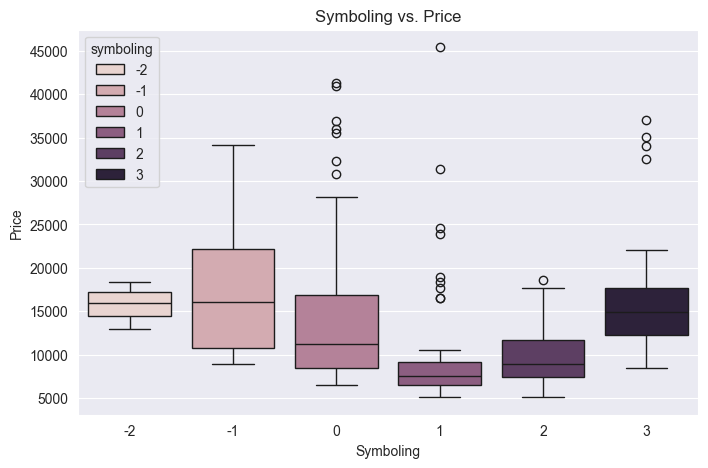

In [294]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
sns.countplot(x = cars_df['symboling'], hue = 'symboling', data = cars_df)
plt.show()

sns.boxplot(x = 'symboling', y = 'price', hue = 'symboling', data = cars_df)
plt.title('Symboling vs. Price')
plt.xlabel('Symboling')
plt.ylabel('Price')
plt.show()

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

Looking at the 2 plots, the shape of the correlation is a parabola as the countplot has a positive parabola while the boxplot has a negative. When looking at the box-plot its important to analyze that for every symboling and price relationship, the bottom line of the box plot for each symboling is top 25% quartile, second space inside the box is top 50% quartile, then third space inside the box is top 75% quartile, and finally the last line is top 100% quartile.

3.4 Create the following plots

    1. A plot of enginetype on the x-axis, and the value counts on the y-axis.
    2. A box plot of enginetype on the x-axis and price on the y-axis.

[4 Points]

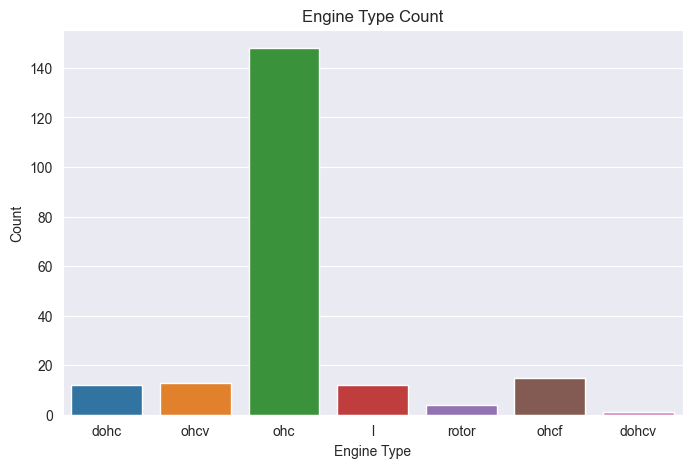

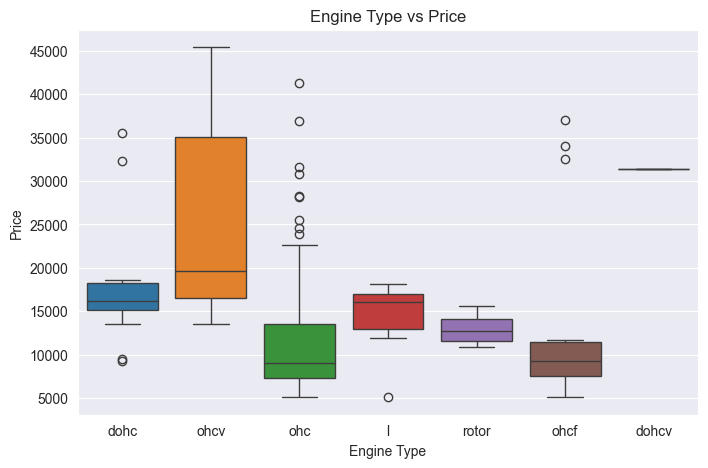

In [295]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
sns.countplot(x = cars_df['enginetype'], hue = 'enginetype', data = cars_df)
plt.title('Engine Type Count')
plt.xlabel('Engine Type')
plt.ylabel('Count')
plt.show()

sns.boxplot(x = 'enginetype', y = 'price', hue = 'enginetype', data = cars_df)
plt.title('Engine Type vs Price')
plt.xlabel('Engine Type')
plt.ylabel('Price')
plt.show()

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

Based on the 2 plots, we can conclude that the more counts/availability of certain of engine, the cheaper the price in comparison. But, this statement doesn't really apply for every single engine because there are some engine type that have more count/availability and are more expensive than the one's with less count/availability as although its not described in the plots, there's other factors to take into consideration like the engine quality, power, and other factors that describe why its cheaper or more expensive.

3.5 Create the following plots

    1. A plot of cylindernumber on the x-axis, and the value counts on the y-axis.
    2. A box plot of cylindernumber on the x-axis and price on the y-axis.

[4 Points]

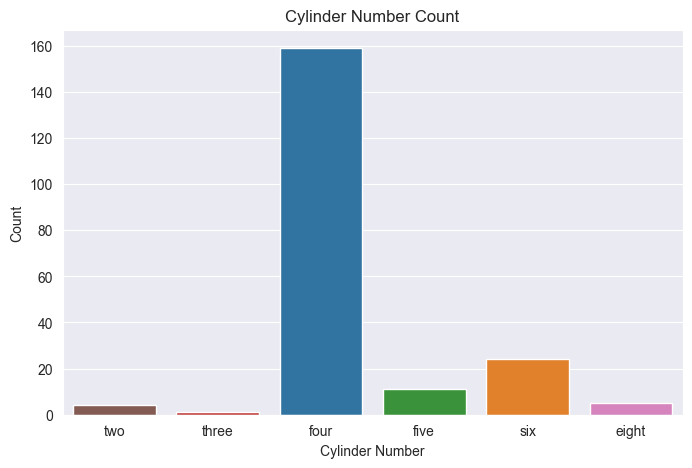

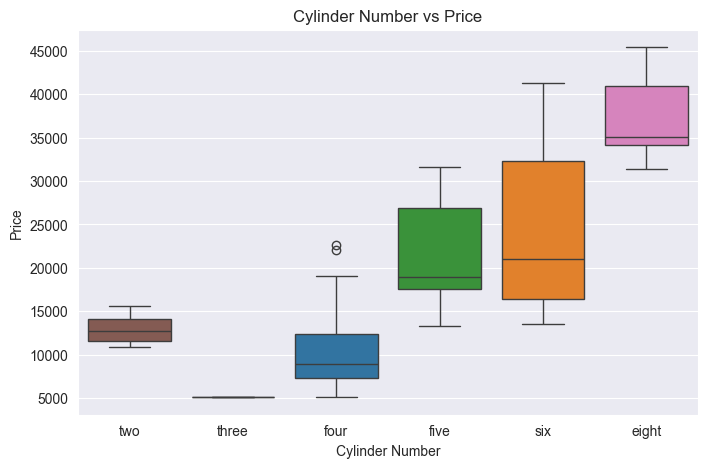

In [296]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

order = ['two','three','four','five','six','eight']

sns.countplot(x=cars_df['cylindernumber'], hue='cylindernumber', data = cars_df, order = order)
plt.title('Cylinder Number Count')
plt.xlabel('Cylinder Number')
plt.ylabel('Count')
plt.show()

sns.boxplot(x='cylindernumber', y='price', hue='cylindernumber', data = cars_df, order = order)
plt.title('Cylinder Number vs Price')
plt.xlabel('Cylinder Number')
plt.ylabel('Price')
plt.show()

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

Given that the most amount of cylinder engines there are available based on the dataset is the four cylinder engine, they're the cheapest out of all other engines as described in the boxplot above. Cylinders play a great role in determining car price as more cylinders in a car engine typically add power for the car as bigger cars tend to have more cylinders engine. Along with that, it seems that after four cylinders there's a positive linear relationship in terms of how five cylinders engine cars cost more than four, the six one's cost more than five, and eight one's cost more than all the other. Despite four cylinder engine cars being the cheapest, it also seems to be that the three cylinder engine cars cost almost about the same and two cylinder engine cars cost a bit more. Therefore, in this case its important to take into consideration the amount of certain cylinders car there are, the brand of that cylinder engine car, etc. These considerations is the reason why box plot plays a significant role in making analysis.

3.6 Create the following plots

    1. A plot of fuelsystem on the x-axis, and the value counts on the y-axis.
    2. A box plot of fuelsystem on the x-axis and price on the y-axis.

[5 Points]

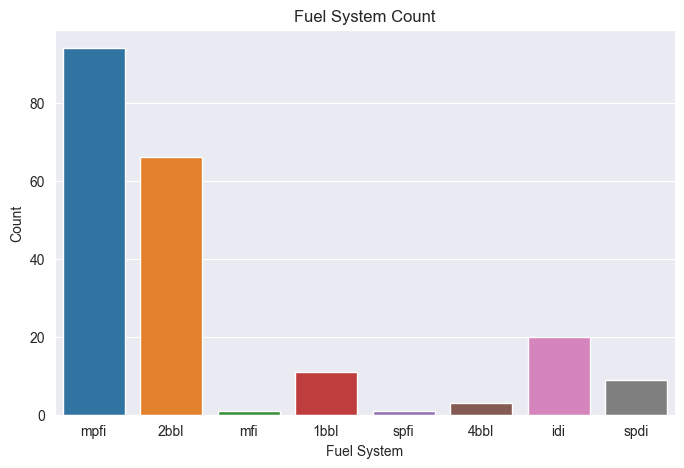

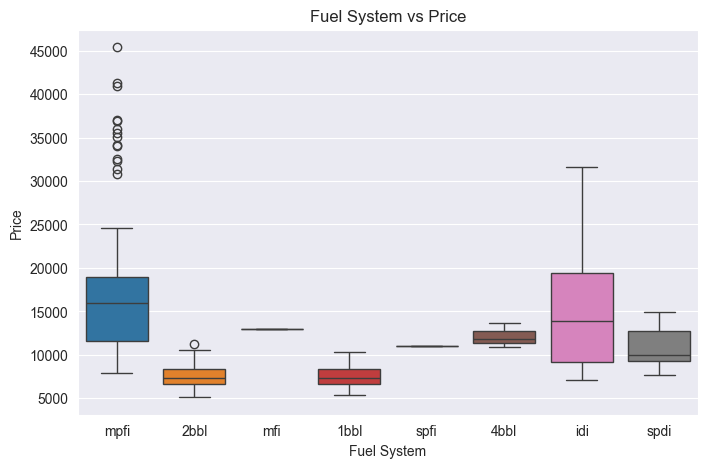

In [297]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
sns.countplot(x = cars_df['fuelsystem'], hue = 'fuelsystem', data = cars_df)
plt.title('Fuel System Count')
plt.xlabel('Fuel System')
plt.ylabel('Count')
plt.show()

sns.boxplot(x = 'fuelsystem', y = 'price', hue = 'fuelsystem', data = cars_df)
plt.title('Fuel System vs Price')
plt.xlabel('Fuel System')
plt.ylabel('Price')
plt.show()

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

Based on the 2 plots, the price of the vehicle based upon the fuel system has lesser to do with fuel system itself as there are some fuel systems with less count/availability that cost more or less than those with more count/availability. Therefore, It's important to take into consideration other factors. When we're talking about fuel, the MPG is more important than fuel system itself as the more fuel system type there is doesn't generally contribute to lowering the price of the vehicle.

3.7 Create the following plots

    1. A plot of drivewheel on the x-axis, and the value counts on the y-axis.
    2. A box plot of drivewheel on the x-axis and price on the y-axis.

[5 Points]

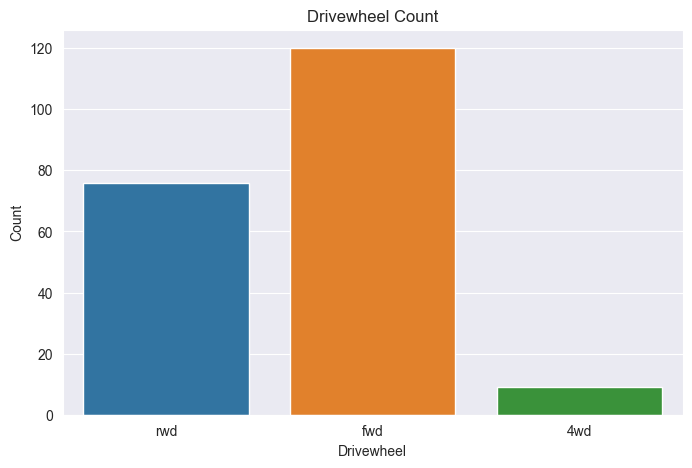

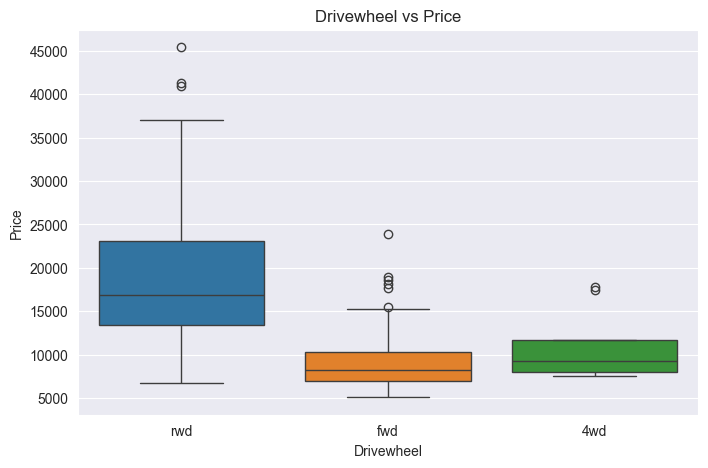

In [298]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
sns.countplot(x = cars_df['drivewheel'], hue = 'drivewheel', data = cars_df)
plt.title('Drivewheel Count')
plt.xlabel('Drivewheel')
plt.ylabel('Count')
plt.show()

sns.boxplot(x = 'drivewheel', y = 'price', hue = 'drivewheel', data = cars_df)
plt.title('Drivewheel vs Price')
plt.xlabel('Drivewheel')
plt.ylabel('Price')
plt.show()

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

Just as we see supply and demand determining prices, we can conclude that the Drivewheel type plays a role in price of the vehicle as there's more fwd vehicles than rwd and 4wd to where the fwd cars are cheaper in price as compared to the rwd and 4wd cars.

3.8 Create the following plots

    1. A plot of enginelocation on the x-axis, and the value counts on the y-axis.
    2. A box plot of enginelocation on the x-axis and price on the y-axis.

[5 Points]

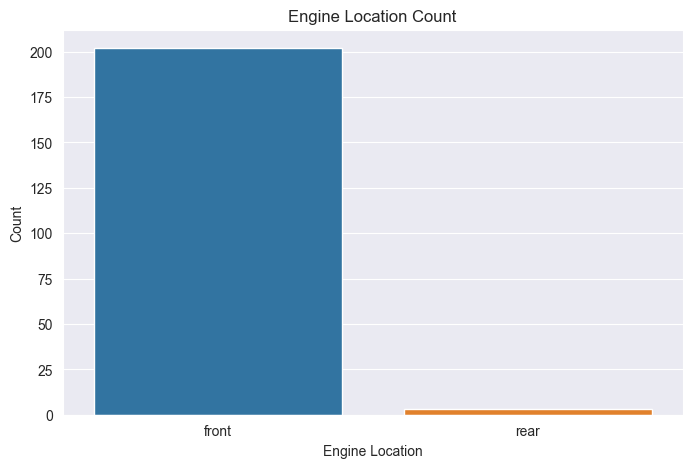

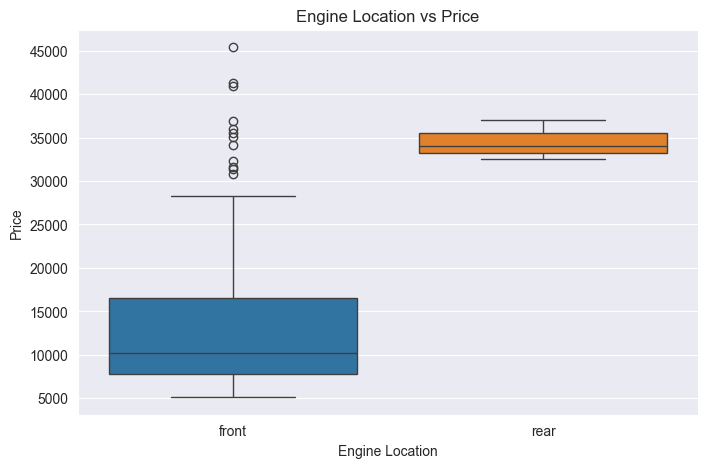

In [299]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

sns.countplot(x = cars_df['enginelocation'], hue = 'enginelocation', data = cars_df)
plt.title('Engine Location Count')
plt.xlabel('Engine Location')
plt.ylabel('Count')
plt.show()

sns.boxplot(x = 'enginelocation', y = 'price', hue = 'enginelocation', data = cars_df)
plt.title('Engine Location vs Price')
plt.xlabel('Engine Location')
plt.ylabel('Price')
plt.show()

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

It seems to be that as there's more vehicles with engines in the front than in the rear, we could conclude by visualizing the Price boxplot that the cars with front engine location are cheaper than the one's with rear engine location.

3.9 Create the following plots

    1. A plot of fueltype on the x-axis, and the value counts on the y-axis.
    2. A box plot of fueltype on the x-axis and price on the y-axis.

[5 Points]

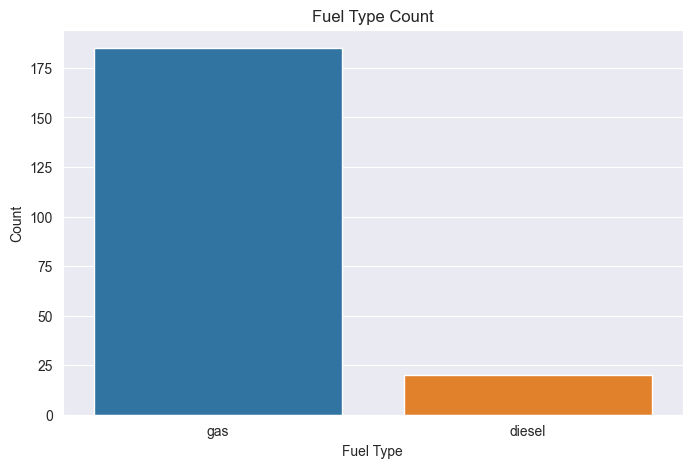

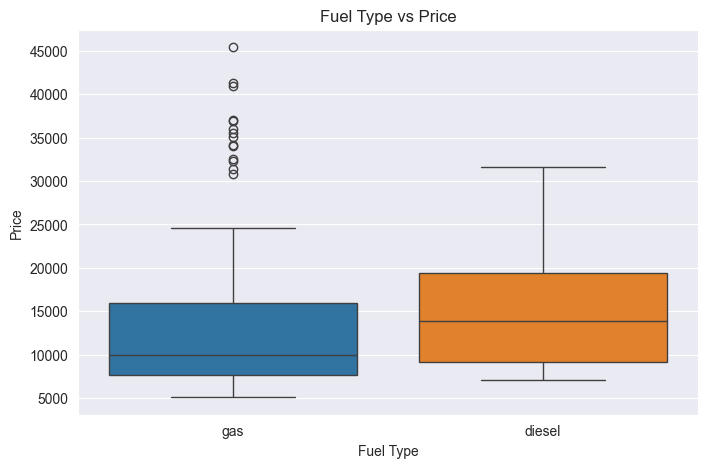

In [300]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

sns.countplot(x = cars_df['fueltype'], hue = 'fueltype', data = cars_df)
plt.title('Fuel Type Count')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

sns.boxplot(x = 'fueltype', y = 'price', hue = 'fueltype', data = cars_df)
plt.title('Fuel Type vs Price')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

Given that there are more gas vehicles than diesel vehicles, we can conclude by visualizing our Price box plot that the gas powered cars are cheaper than the diesel powered cars.

3.10 Create the following plots

    1. A plot of doornumber on the x-axis, and the value counts on the y-axis.
    2. A box plot of doornumber on the x-axis and price on the y-axis.

[5 Points]

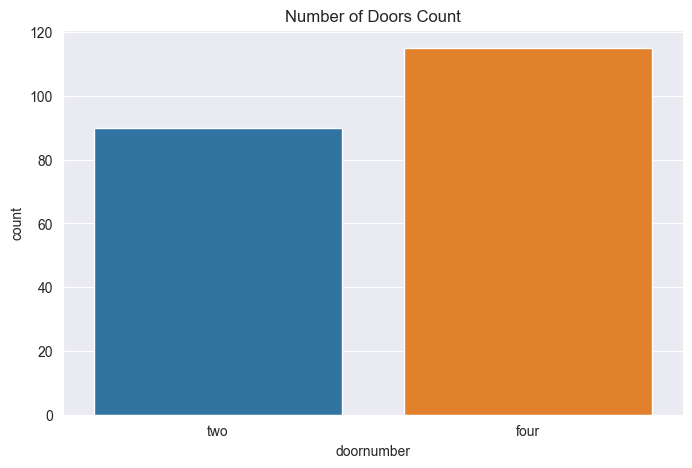

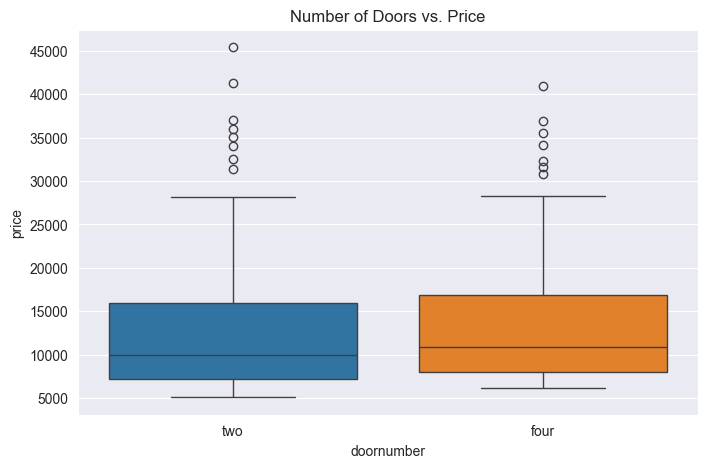

In [301]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

sns.countplot(x = cars_df['doornumber'], hue = 'doornumber', data = cars_df)
plt.title('Number of Doors Count')
plt.xlabel('doornumber')
plt.ylabel('count')
plt.show()

sns.boxplot(x = 'doornumber', y = 'price', hue = 'doornumber', data = cars_df)
plt.title('Number of Doors vs. Price')
plt.xlabel('doornumber')
plt.ylabel('price')
plt.show()

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

Despite there being more four door vehicles than two door vehicles, it seems to be that the two door vehicles are slightly cheaper than four door vehicles when looking at up to the 3/4 or 75% quartile of the box plot for two door vehicles based on visualizing the box plots.

3.11 Create the following plots

    1. A plot of aspiration on the x-axis, and the value counts on the y-axis.
    2. A box plot of aspiration on the x-axis and price on the y-axis.

[5 Points]

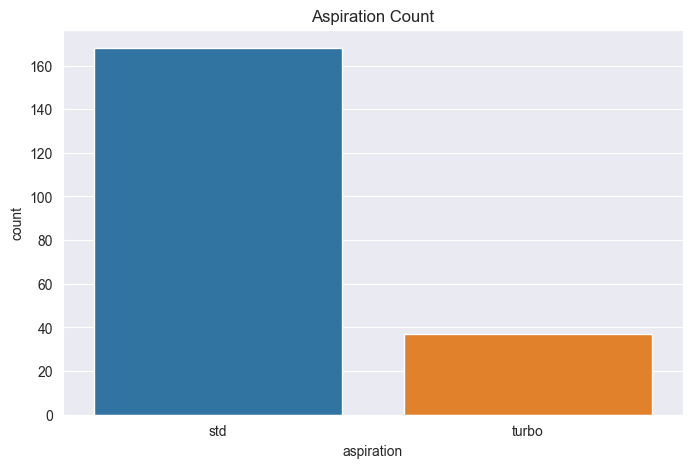

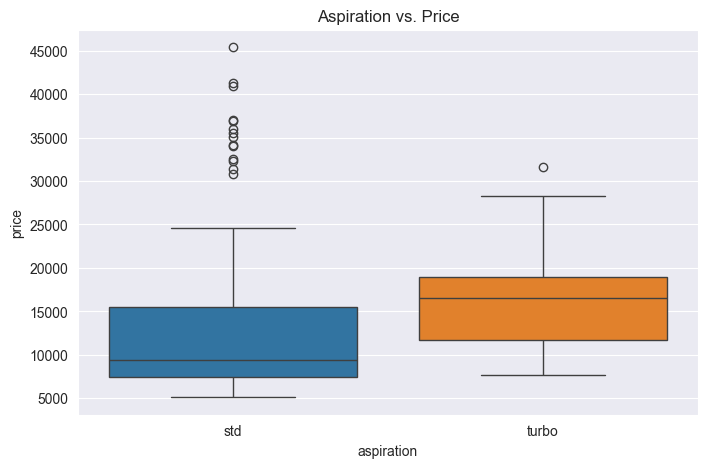

In [302]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

sns.countplot(x = cars_df['aspiration'], hue = 'aspiration', data = cars_df)
plt.title('Aspiration Count')
plt.xlabel('aspiration')
plt.ylabel('count')
plt.show()

sns.boxplot(x = 'aspiration', y = 'price', hue = 'aspiration', data = cars_df)
plt.title('Aspiration vs. Price')
plt.xlabel('aspiration')
plt.ylabel('price')
plt.show()

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

It seems to be that with more std aspiration, its cheaper than turbo as there's lesser turbo aspiration based upon visualizing the data.

## Part 4: Visualizing Numerical Data

### [15 Points]

    price
    carlength
    carwidth
    carheight
    curbweight
    enginesize
    boreratio
    stroke
    compressionratio
    horsepower
    peakrpm
    wheelbase
    citympg
    highwaympg

4.1 Create the following plots

    1. A plot showing the price distribution
    2. A box plot of price

[3 Points]

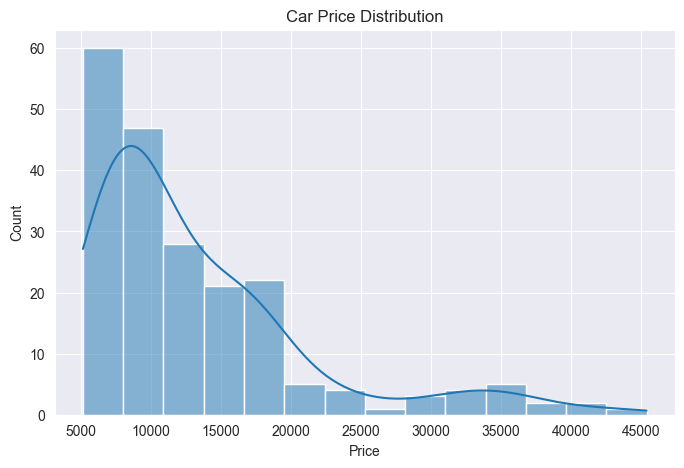

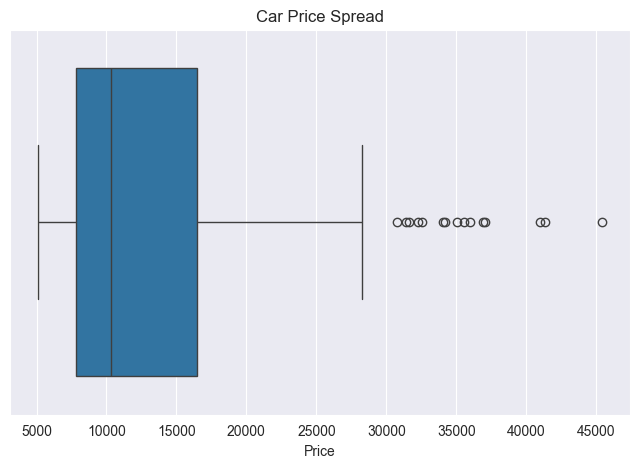

In [303]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

sns.histplot(cars_df['price'], kde = True)
plt.title('Car Price Distribution')
plt.xlabel('Price')
plt.show()

sns.boxplot(x = 'price', data = cars_df)
plt.title('Car Price Spread')
plt.xlabel('Price')
plt.show()

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

The 2 plots above provide a negative linear correlation given that there are more count of cheaper cars than expensive cars. As cars get more and more expensive, the count amount decreases as described in the plots when visualizing them.

Let's try and get an idea of how the car attributes related to a car's size are related to price.

4.2 Create the following plots

    1. A scatter plot of carlength vs price.
    2. A scatter plot of carwidth vs price.
    3. A scatter plot of carheight vs price.
    4. A scatter plot of carweight vs price.

[3 Points]

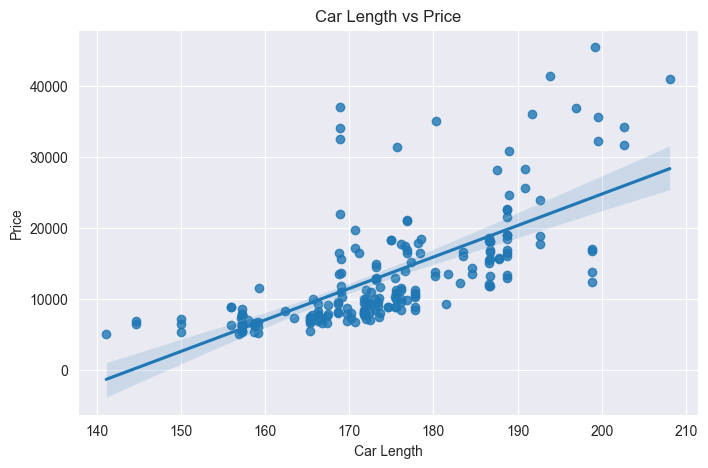

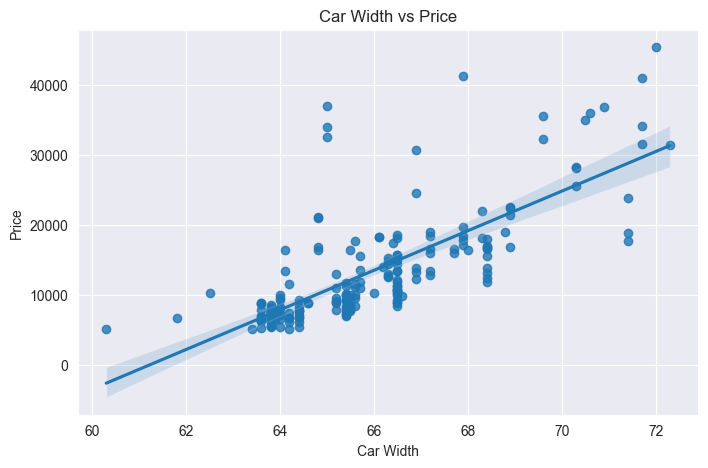

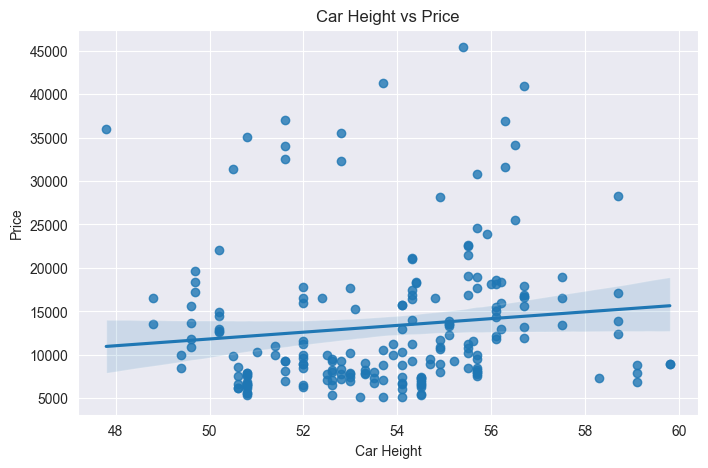

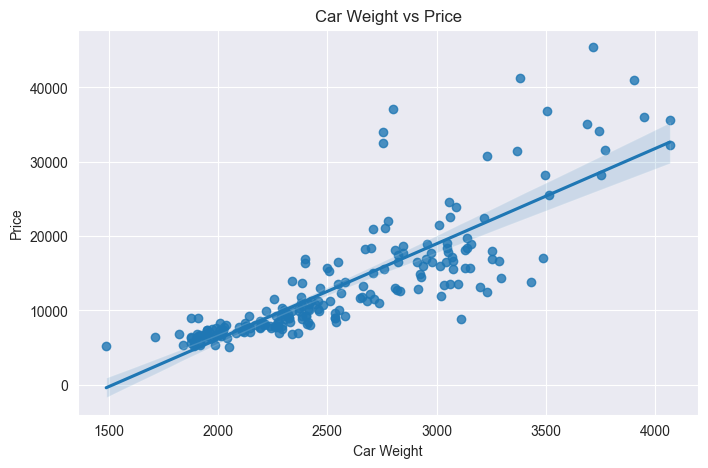

In [304]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

sns.regplot(x = cars_df['carlength'], y = cars_df['price'], data = cars_df)
plt.title('Car Length vs Price')
plt.xlabel('Car Length')
plt.ylabel('Price')
plt.show()


sns.regplot(x = cars_df['carwidth'], y = cars_df['price'], data = cars_df)
plt.title('Car Width vs Price')
plt.xlabel('Car Width')
plt.ylabel('Price')
plt.show()


sns.regplot(x = cars_df['carheight'], y = cars_df['price'], data = cars_df)
plt.title('Car Height vs Price')
plt.xlabel('Car Height')
plt.ylabel('Price')
plt.show()


sns.regplot(x = cars_df['curbweight'], y = cars_df['price'], data = cars_df)
plt.title('Car Weight vs Price')
plt.xlabel('Car Weight')
plt.ylabel('Price')
plt.show()

After creating the 4 plots above, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

Based on all 4 plots, we can conclude that all plots have a positive linear relationship as we're seeing a linear regression as when our x-variable increases, the price of the car also increases. It seems to be that with more length, width, height, and weight of a car the price gets increasingly affected as those factors contribute to a bigger size car making it cost more. This conclusion comes from visualizing all four of the plots and seeing that positive linear relation based on the regression line. 

4.3 Create scatter plots of the remaining numerical variables to see their relationship with price.

Create the following plots

    1. A scatter plot of enginesize vs price.
    2. A scatter plot of boreratio vs price.
    3. A scatter plot of stroke vs price.
    4. A scatter plot of compressionratio vs price.
    5. A scatter plot of horsepower vs price.
    6. A scatter plot of peakrpm vs price.
    7. A scatter plot of wheelbase vs price.
    8. A scatter plot of citympg vs price.
    9. A scatter plot of highwaympg vs price.

[3 Points]

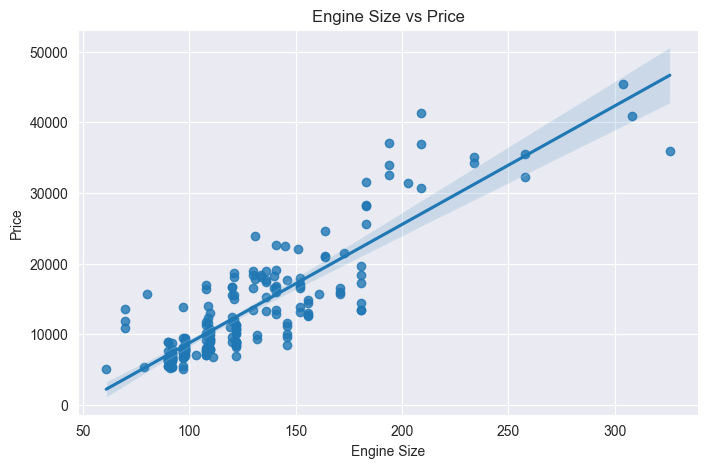

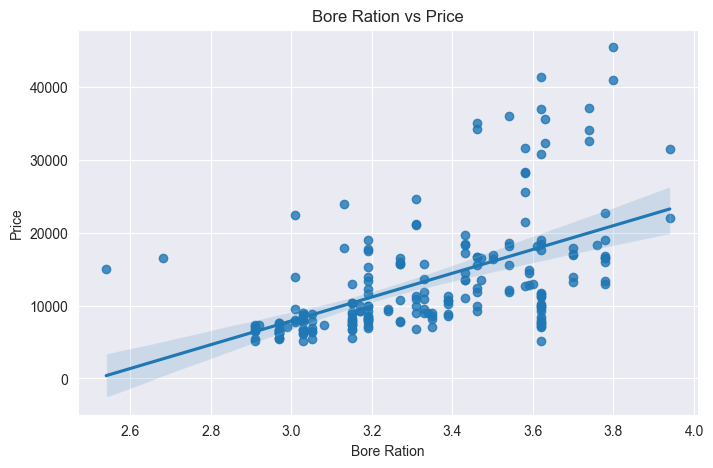

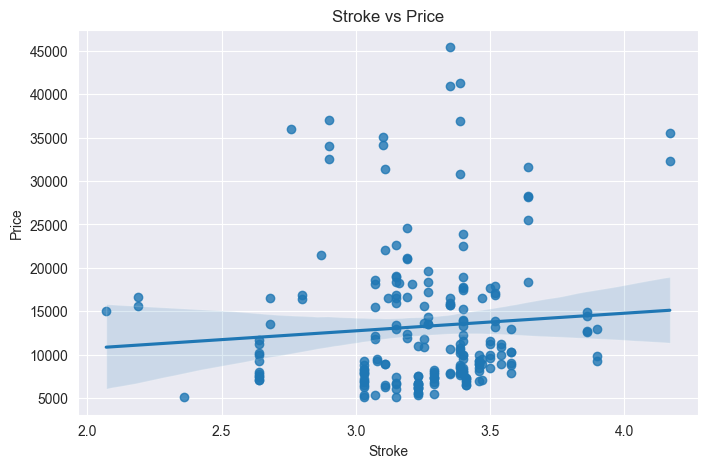

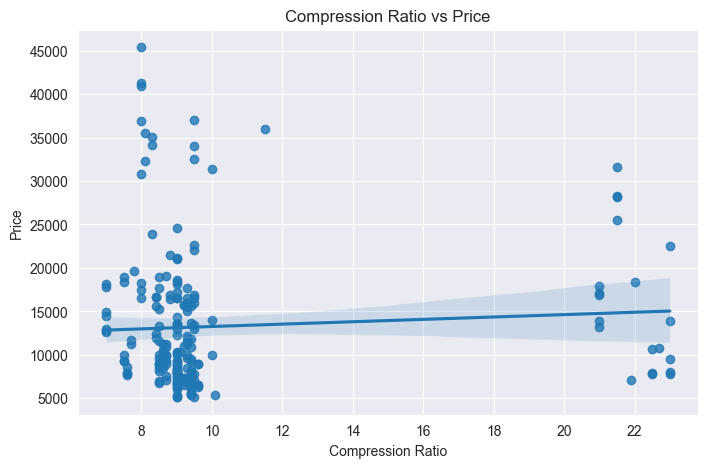

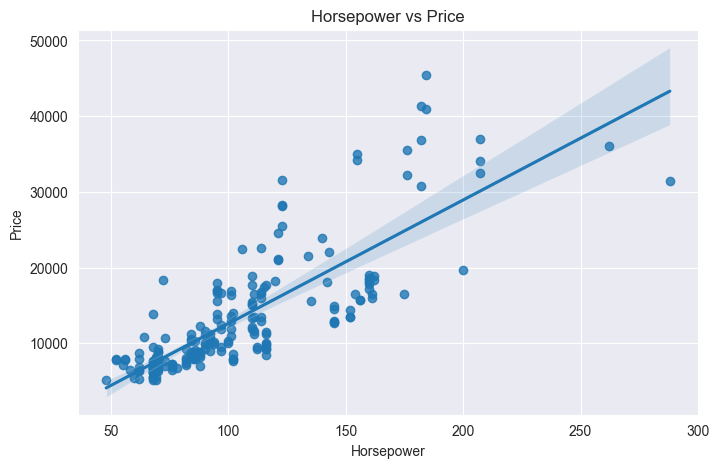

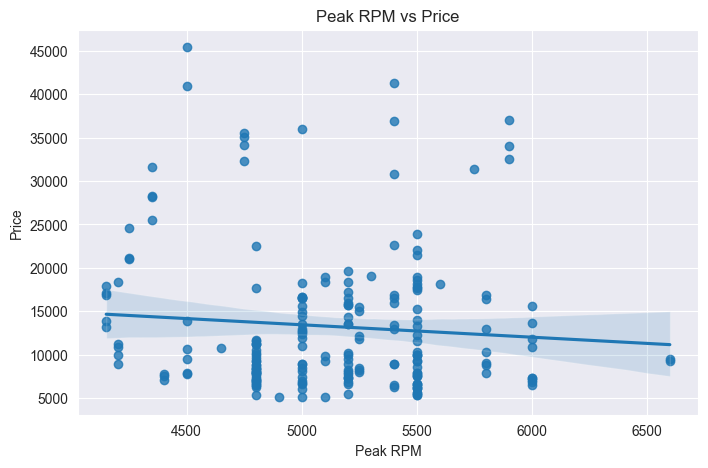

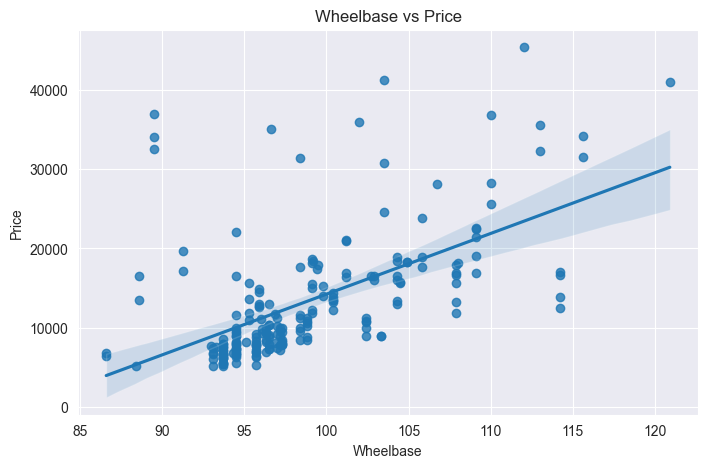

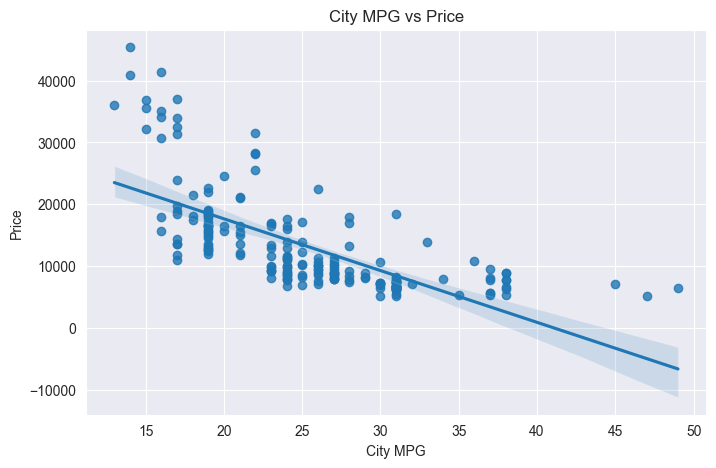

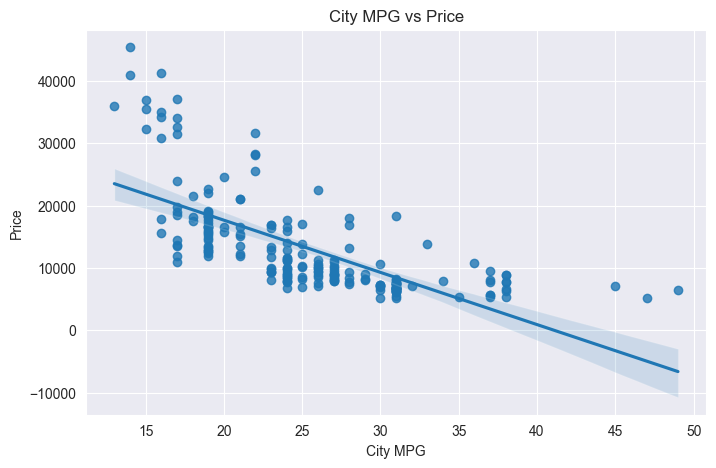

In [305]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

sns.regplot(x = cars_df['enginesize'], y = cars_df['price'], data = cars_df)
plt.title('Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()


sns.regplot(x = cars_df['boreratio'], y = cars_df['price'], data = cars_df)
plt.title('Bore Ration vs Price')
plt.xlabel('Bore Ration')
plt.ylabel('Price')
plt.show()


sns.regplot(x = cars_df['stroke'], y = cars_df['price'], data = cars_df)
plt.title('Stroke vs Price')
plt.xlabel('Stroke')
plt.ylabel('Price')
plt.show()


sns.regplot(x = cars_df['compressionratio'], y = cars_df['price'], data = cars_df)
plt.title('Compression Ratio vs Price')
plt.xlabel('Compression Ratio')
plt.ylabel('Price')
plt.show()


sns.regplot(x = cars_df['horsepower'], y = cars_df['price'], data = cars_df)
plt.title('Horsepower vs Price')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()


sns.regplot(x = cars_df['peakrpm'], y = cars_df['price'], data = cars_df)
plt.title('Peak RPM vs Price')
plt.xlabel('Peak RPM')
plt.ylabel('Price')
plt.show()


sns.regplot(x = cars_df['wheelbase'], y = cars_df['price'], data = cars_df)
plt.title('Wheelbase vs Price')
plt.xlabel('Wheelbase')
plt.ylabel('Price')
plt.show()


sns.regplot(x = cars_df['citympg'], y = cars_df['price'], data = cars_df)
plt.title('City MPG vs Price')
plt.xlabel('City MPG')
plt.ylabel('Price')
plt.show()


sns.regplot(x = cars_df['citympg'], y = cars_df['price'], data = cars_df)
plt.title('City MPG vs Price')
plt.xlabel('City MPG')
plt.ylabel('Price')
plt.show()

After creating the plots above, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

Based upon visualizing the various plots above, we can say that Engine Size, Bore Ration, Horsepower, and Wheelbase has a positive linear relationship as when those things are greater, the price of vehicle is higher to where it has a relationship with the price of vehicle with seeing the price increasing. Then for Stroke, Compression Ratio, and Peak RPM the relationship seems to be pretty scattered. While for the other variable plots, its a decreasing linear relationship as price of vehicle is lower as the variable increases like greater MPG leads to a lower economical price as compared to the vehicles with lower MPG.

4.4 Create a heatmap or correlation matrix to inspect the correlations in our dataset.

[3 Points]

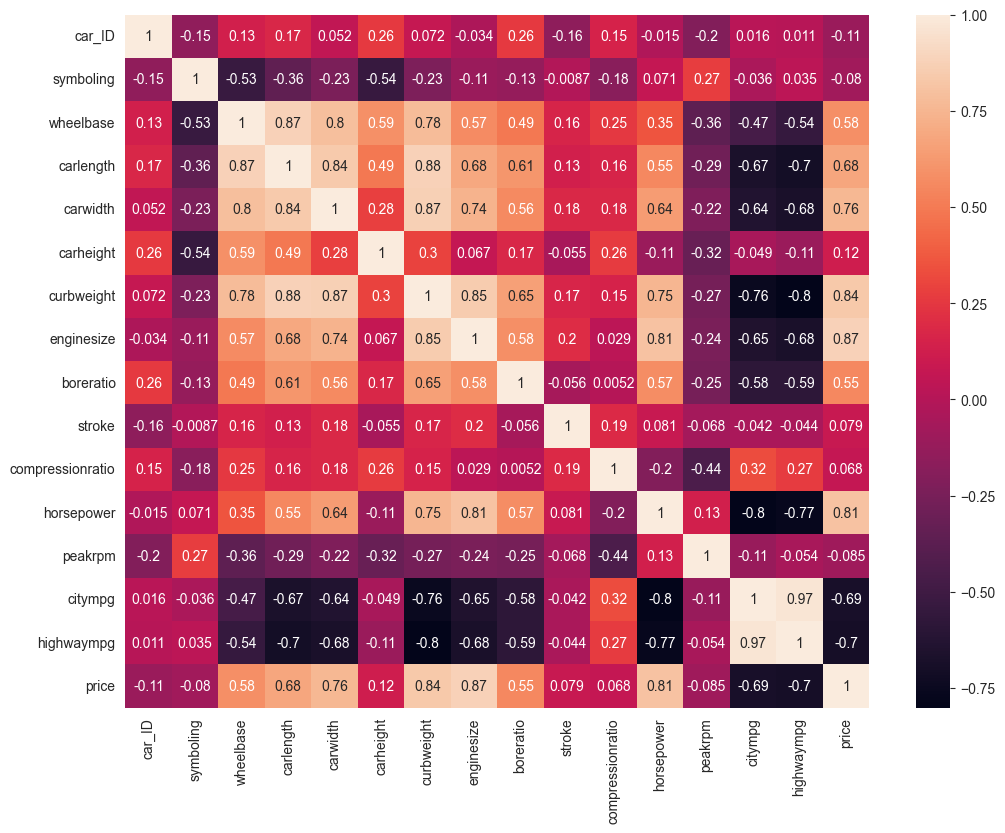

In [306]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

values = ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

plt.figure(figsize=(12, 9))
sns.heatmap(cars_df[values].corr(), annot=True)
plt.show()

After creating the plot above, what can you conclude? Are there any features you can combine to form a new one? If so, try it out and see how it affects your final results in the end.

### TYPE YOUR ANSWER HERE

Yes, in the code below I have combined fuel economy and wheelbase as they seem to be the feature types to combine together to form a new one as it would play a significant affect in having a good R^2 value since the variables they're combined with tend to have around the same value in the heatmap above so its just better to combine in order to bring affect for our R^2 value and prove this model to be useful for this dataset.

4.5 For example, citympg and highwaympg can be combined into a single feature. Create a new column called 'fuel_economy' that's a combination of the 2.


In [307]:
### WRITE YOUR CODE HERE ###

cars_df['fuel_economy'] = (cars_df['citympg'] + cars_df['highwaympg']) / 2
cars_df['wheelbasecombo'] = (cars_df['carlength'] + cars_df['wheelbase']) / 2

cars_df[['citympg', 'highwaympg', 'fuel_economy']].head()

drop_features = {
    #'citympg',
    #'highwaympg',
    'car_ID',
    'CarName',
    'car_company',
    'carlength',
    'carwidth',
    'peakrpm',
    'doornumber',
    #'stroke',
    'compressionratio',
    'curbweight',
    'carheight',
    'wheelbase'
}

cars_df = cars_df.drop(drop_features, axis = 1)

After visual analysis, which variables do you believe to be significant when predicting price, and why?

[3 Points]

### TYPE YOUR ANSWER HERE

I believe the most important variables that play a significant role when predicting price based on visual analysis is the variables pertaining the engine specs, such as the enginesize, boreratio, stroke, horsepower, etc. These factors play a great role in determining car prices as engine is what provides power to the car and more powerful engine cars tend to cost more. Asides from engine, there are other variables that play somewhat of a significant role in predicting price, such as body type and such but not as much as engine does. It's true how German brand cars generally cost more than Japanese brands but there could be an 8-Cylinder Japanese car like a brand new Toyota Tundra versus a brand new BMW 3-series in which the Toyota Tundra costs more than the BMW 3-series because the Tundra has a bigger cylinder engine, its a pickup truck, more engine power, etc.

## Part 5: Data Pre-Processing

### [5 Points]

Perform the following

    1. Convert your categorical variables into dummy variables
    2. Scale the data using a scaler of your choice
    3. Split your data into a training and testing set, with test size of 0.30



In [308]:
### WRITE YOUR CODE HERE ###

from sklearn.model_selection import train_test_split

cars_df = pd.get_dummies(cars_df, drop_first= True)

x = cars_df.drop('price', axis=1)
y = cars_df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

## Part 6: Model Creation and Evaluation

### [15 Points]

Perform the following using sklearn

    1. Create a linear regression model, and train (fit) it on the training data.
    2. Run the test data through your model to obtain predictions. Save these predictions into a variable called 'predictions'.
    4. Create a scatter plot of the true price labels vs the predicted price value of your model.
    5. Create a histogram of the residuals
    6. Print the $R^2$ of your model

_Note: You don't need to obtain the same results as us. If you made any changes earlier and obtain better results, then even better. Just make sure you're not scoring significantly lower than our obtained values._

[8 Points]

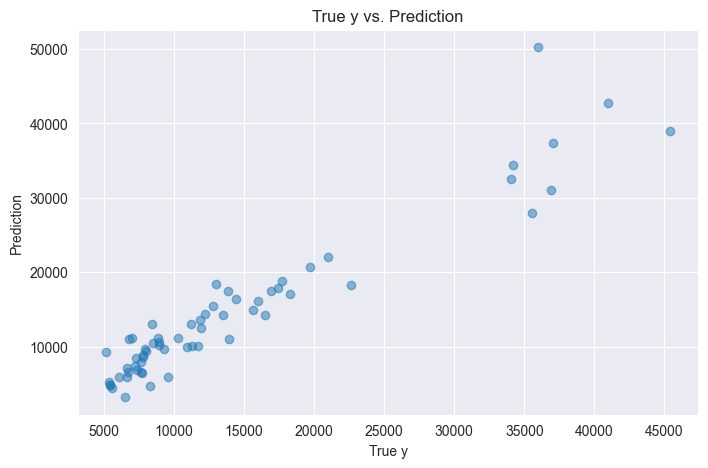

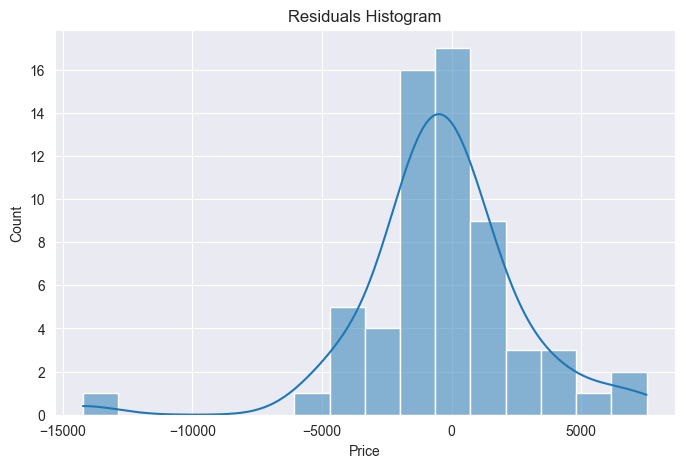

The R-Squared score is: 0.9047676427407061


In [309]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


lm = LinearRegression()
lm.fit(x_scaled, y_train)


predictions = lm.predict(x_test_scaled)


plt.scatter(y_test, predictions, alpha=0.5)
plt.title('True y vs. Prediction')
plt.xlabel('True y')
plt.ylabel('Prediction')
plt.show()


residuals = y_test - predictions
sns.histplot(residuals, kde=True)
plt.title('Residuals Histogram')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


print("The R-Squared score is:", r2_score(y_test, predictions))

Lastly, create a dataframe of your model's coefficents. For example, we obtained the coefficients below.

[7 Points]

In [311]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

coefficient_df = pd.DataFrame(lm.coef_, x.columns, columns=['Coefficient'])
coefficient_df

,Coefficient
symboling,2.604488e+02
enginesize,3.073265e+03
boreratio,-3.552100e+02
stroke,-1.138356e+03
horsepower,2.418941e+03
citympg,-1.400237e+03
highwaympg,1.015646e+03
fuel_economy,-1.681742e+02
wheelbasecombo,9.878398e+02
fueltype_gas,-1.748299e+02


What do __your__ coefficients mean? Write a conclusion answering the problem statement we listed earlier, and what you've learned from the model.

### TYPE YOUR CONCLUSION HERE

The coefficients provided above basically mean whether the coefficient variables play a positive or negative role/impact on our outcome which in our case is the price of the vehicle which is what we're interested in based on our given dataset. Knowing the coefficients is relatively important in making analysis and decisions along with just knowing if our model could be trusted or useful. With knowing the coefficients, we are able to tell which variables and types within that variable have a positive or negative correlation to our outputsuch as the creater number of cylinders in a vehicle has a negative effect on the price of the vehicle. I've gotten to learn significant amount of things from the model by not only printing various graphs and visualizing them to see what has an affect on the price of the vehicle, but also doing trial and error in being able to acheive an R^2 value of at least 0.90 as it involved experimenting by dropping various variables multiple times and looking at the R^2 value as when I noticed it going up, I started to analyze the every dropped variables values in the heatmap and made decisions from there on what variables I shall drop. Based upon everything I did from gathering information about the dataset, visualizing various graphs, training the model, dropping variables to achieve a greater R^2 value, I came to conclusion that my model is a trustworthy and useful model in meeting expectations for the price of cars not only from the R^2 value being achieved, but also realistic factors that play a role in having a positive or negative correlation on the price of vehicle in practice. For instance, we know that Lamborghini's (Not Listed In Our Dataset) has a rear engine location, V12 engine, great amount of horsepower, low MPG, and many different factors that leads to a higher vehicle price as compared to other vehicles and in practice its true how Lamborghini is indeed an expensive vehicle because we're expected to pay at least $200,000 if we go shop for a brand new and pretty generous amount for Pre-Owned. I brought up this Lamborghini example to further validate my point.